In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold,StratifiedKFold
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score, f1_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, StackingClassifier

import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings .filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv("D:/Desktop/neo.csv")
df.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [3]:
df.tail()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,Earth,False,25.00,False
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,Earth,False,26.00,False
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,Earth,False,24.60,False
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,Earth,False,27.80,False
90835,54205447,(2021 TW7),0.039862,0.089133,27024.455553,5.977213e+07,Earth,False,24.12,False


In [4]:
df.sample()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
27825,3942366,(2019 YO),0.013322,0.029788,19485.169813,4.104270e+07,Earth,False,26.5,False


In [5]:
df.shape

(90836, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [7]:
df.columns

Index(['id', 'name', 'est_diameter_min', 'est_diameter_max',
       'relative_velocity', 'miss_distance', 'orbiting_body', 'sentry_object',
       'absolute_magnitude', 'hazardous'],
      dtype='object')

In [8]:
df.isnull().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,90836.0,1.438288e+07,2.087202e+07,2.000433e+06,3.448110e+06,3.748362e+06,3.884023e+06,5.427591e+07
est_diameter_min,90836.0,1.274321e-01,2.985112e-01,6.089126e-04,1.925551e-02,4.836765e-02,1.434019e-01,3.789265e+01
est_diameter_max,90836.0,2.849469e-01,6.674914e-01,1.361570e-03,4.305662e-02,1.081534e-01,3.206564e-01,8.473054e+01
relative_velocity,90836.0,4.806692e+04,2.529330e+04,2.033464e+02,2.861902e+04,4.419012e+04,6.292360e+04,2.369901e+05
miss_distance,90836.0,3.706655e+07,2.235204e+07,6.745533e+03,1.721082e+07,3.784658e+07,5.654900e+07,7.479865e+07
absolute_magnitude,90836.0,2.352710e+01,2.894086e+00,9.230000e+00,2.134000e+01,2.370000e+01,2.570000e+01,3.320000e+01


In [11]:
df.nunique()

id                    27423
name                  27423
est_diameter_min       1638
est_diameter_max       1638
relative_velocity     90828
miss_distance         90536
orbiting_body             1
sentry_object             1
absolute_magnitude     1638
hazardous                 2
dtype: int64

In [12]:
df.nunique().sort_values()

orbiting_body             1
sentry_object             1
hazardous                 2
est_diameter_min       1638
est_diameter_max       1638
absolute_magnitude     1638
id                    27423
name                  27423
miss_distance         90536
relative_velocity     90828
dtype: int64

Text(0.5, 1.0, 'Cardinality')

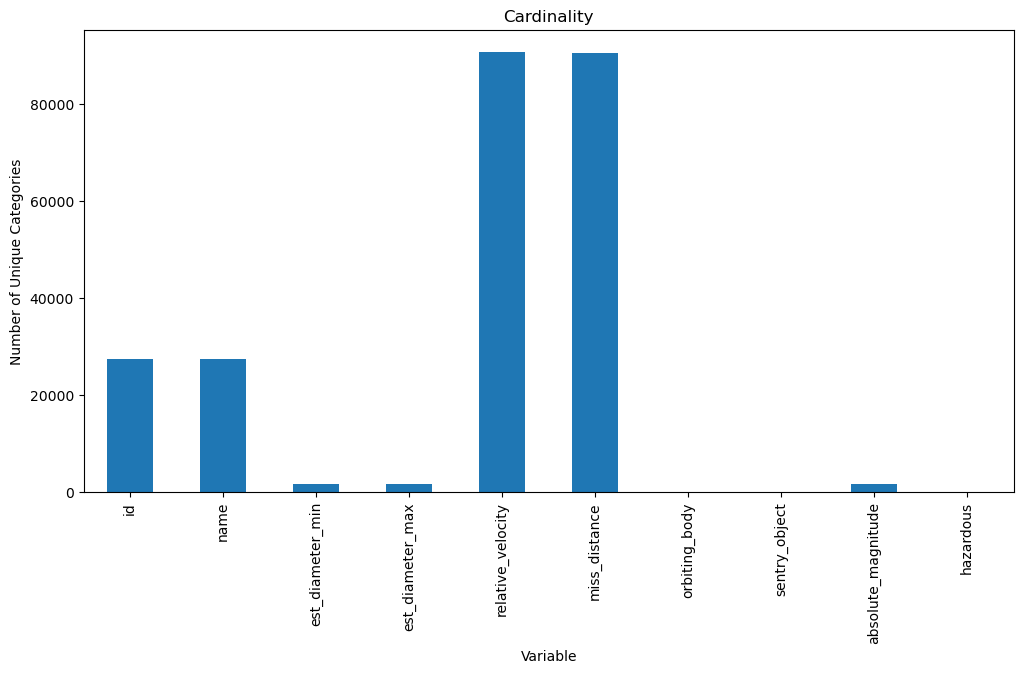

In [13]:
df.nunique().plot.bar(figsize=(12,6))
plt.ylabel("Number of Unique Categories")
plt.xlabel("Variable")
plt.title("Cardinality")

In [14]:
!pip install missingno

<AxesSubplot:>

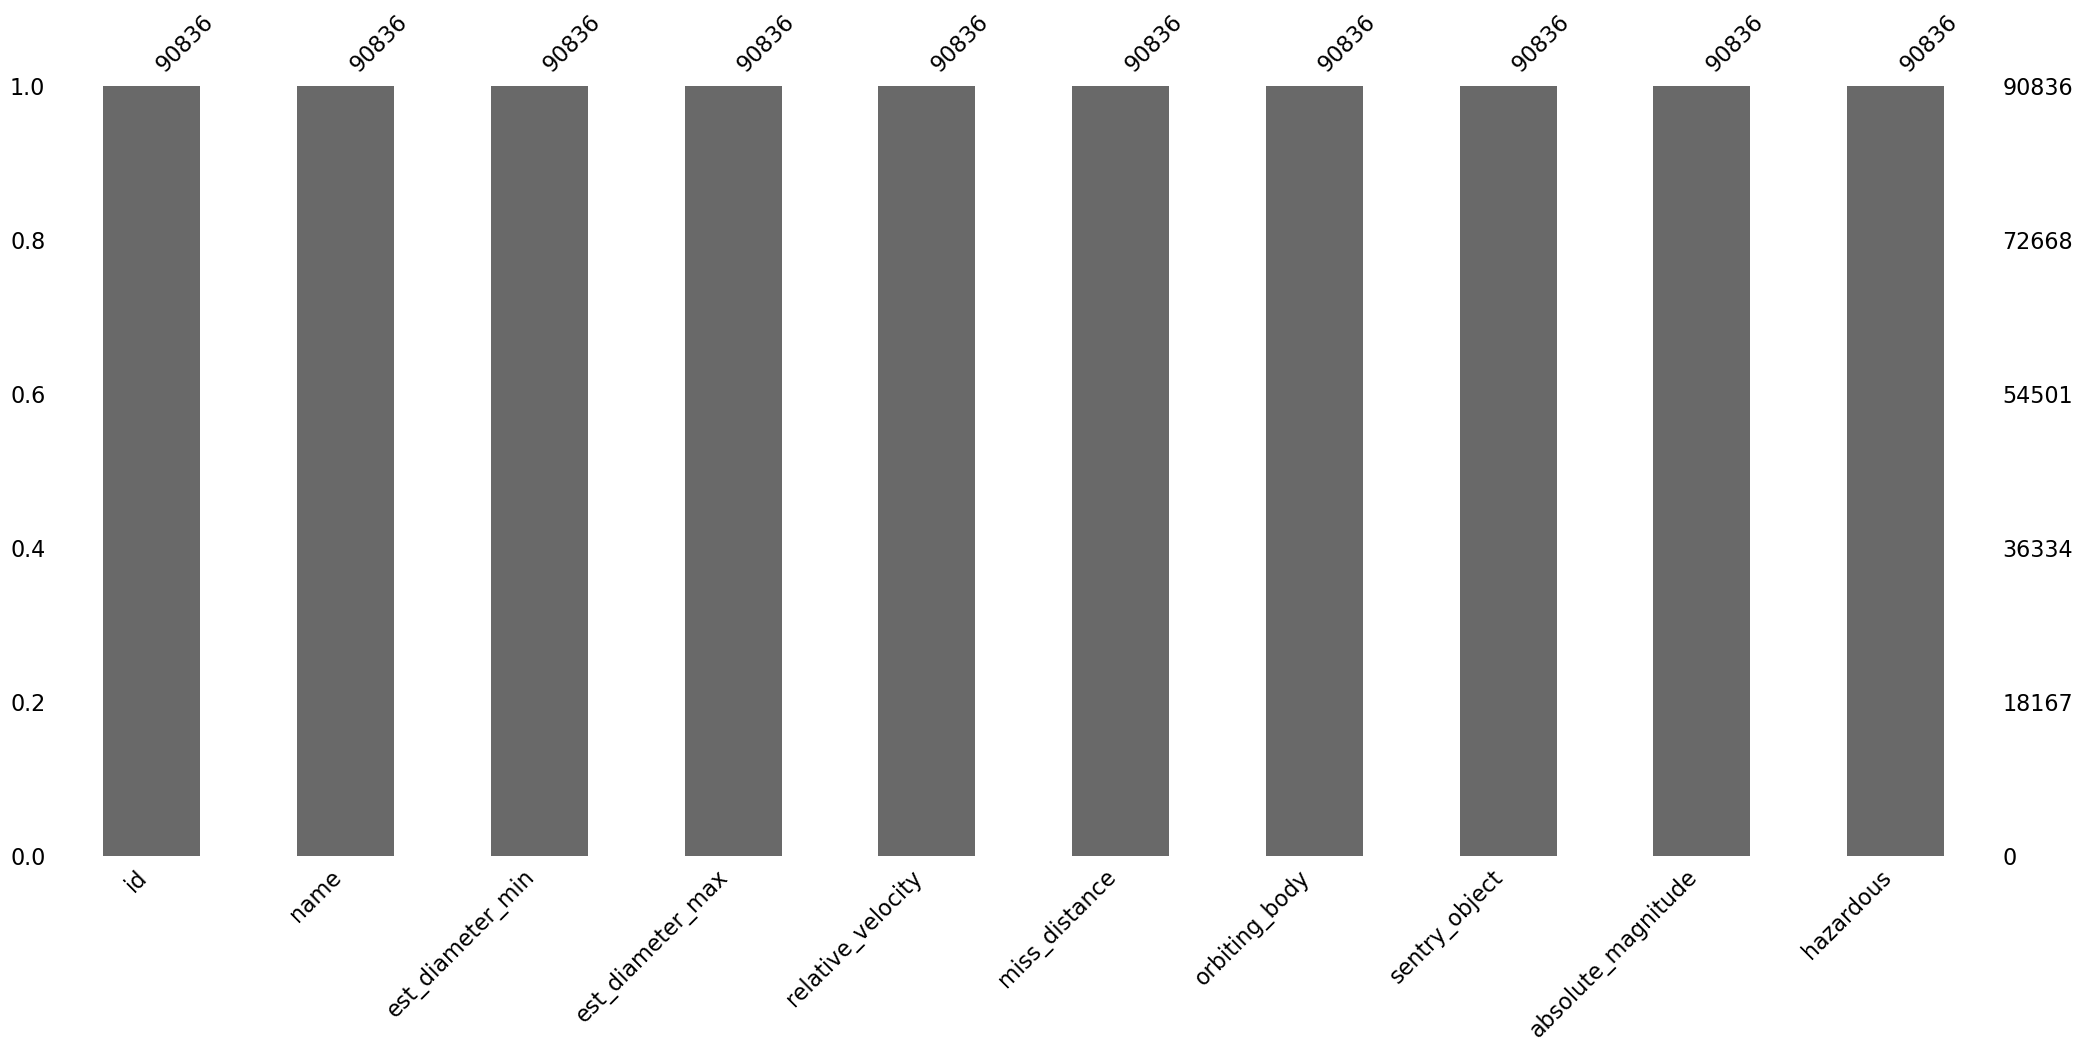

In [15]:
import missingno as mn
mn.bar(df)

In [16]:
eda_df = df.copy()

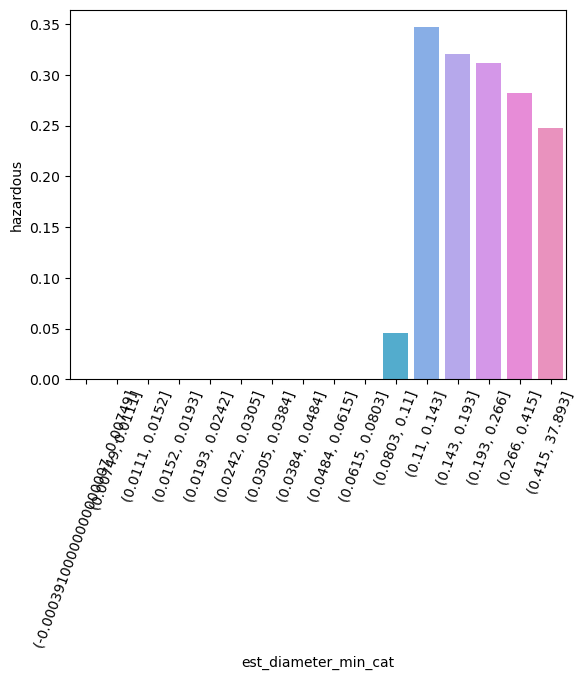

In [17]:
eda_df['est_diameter_min_cat']=pd.qcut(eda_df['est_diameter_min'],16)
bar = eda_df.groupby(by='est_diameter_min_cat').mean()
sns.barplot(data=bar, x=bar.index,y='hazardous')
plt.xticks(rotation=70);

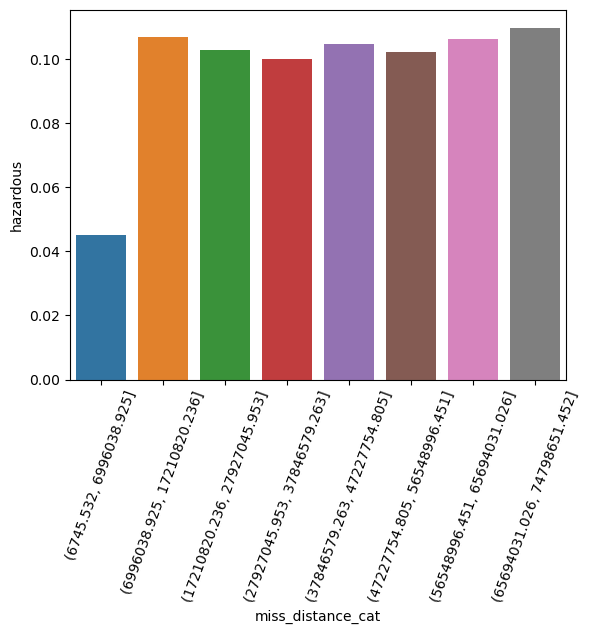

In [18]:
eda_df['miss_distance_cat']=pd.qcut(eda_df['miss_distance'],8)
bar = eda_df.groupby(by='miss_distance_cat').mean()
sns.barplot(data=bar, x=bar.index,y='hazardous')
plt.xticks(rotation=70);

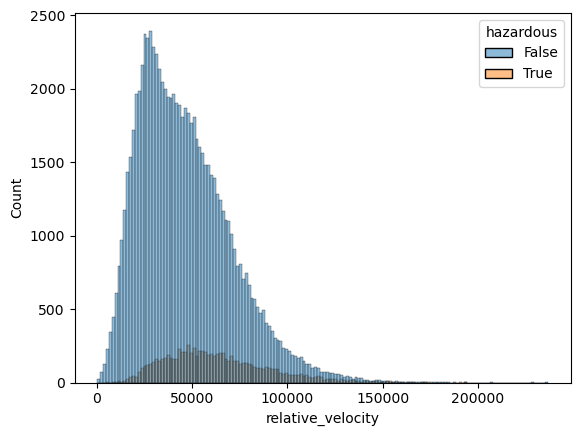

In [19]:
sns.histplot(data = df, x= 'relative_velocity', hue = 'hazardous');

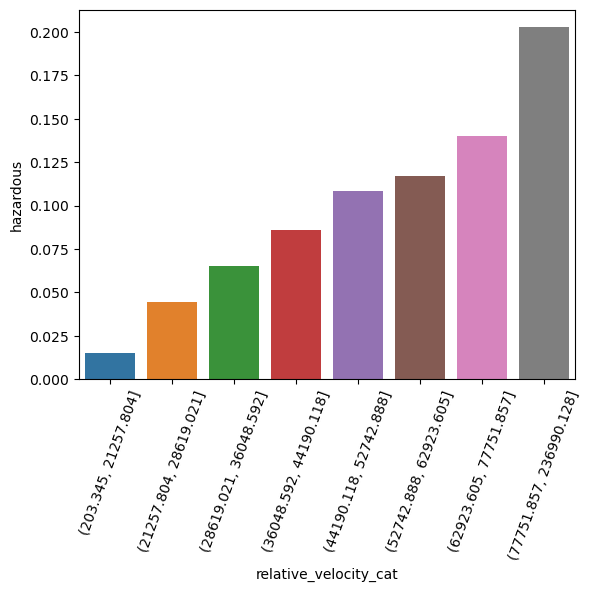

In [20]:
eda_df['relative_velocity_cat']=pd.qcut(df['relative_velocity'],8)
bar = eda_df.groupby(by='relative_velocity_cat').mean()
sns.barplot(data=bar, x=bar.index,y='hazardous')
plt.xticks(rotation=70);

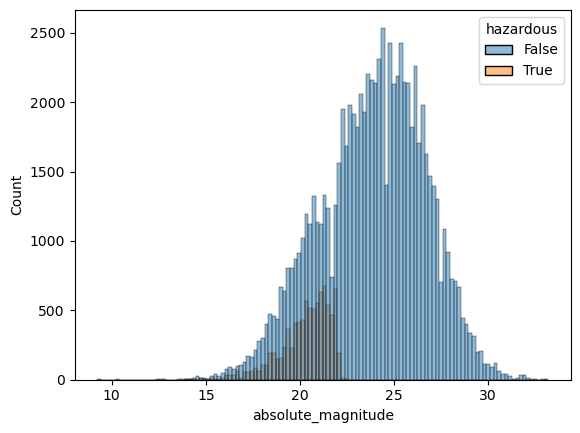

In [21]:
sns.histplot(data = eda_df, x= 'absolute_magnitude', hue = 'hazardous');

In [22]:
num_cols = ["est_diameter_max", "relative_velocity", "miss_distance", "absolute_magnitude"]

In [24]:
unique_name = []

In [25]:
for i in df.columns:
    x = df[i].value_counts().count()
    unique_name.append(x)
pd.DataFrame(unique_name,index=df.columns, columns = ["Total Unique values"])
    
    

,Total Unique values
id,27423
name,27423
est_diameter_min,1638
est_diameter_max,1638
relative_velocity,90828
miss_distance,90536
orbiting_body,1
sentry_object,1
absolute_magnitude,1638
hazardous,2


<AxesSubplot:xlabel='miss_distance', ylabel='Density'>

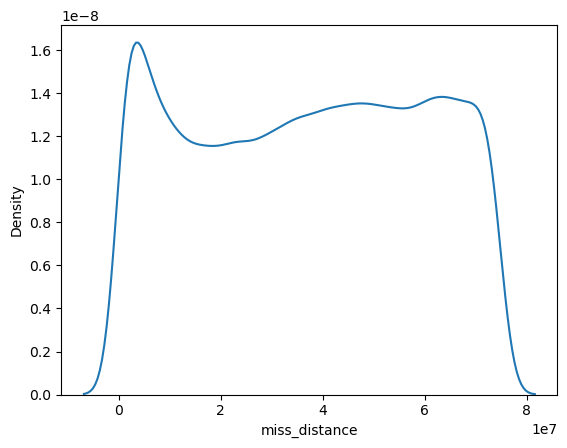

In [26]:
sns.distplot(df["miss_distance"],hist=False)

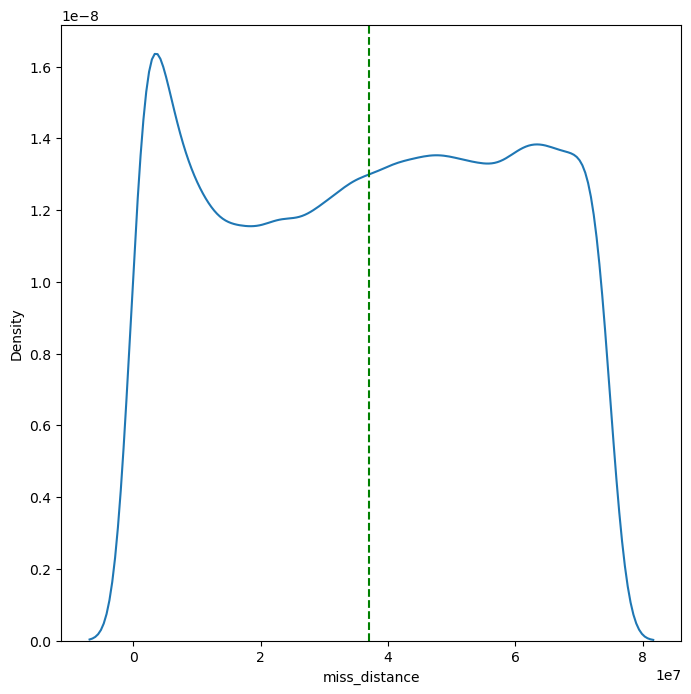

In [27]:
x,y=plt.subplots(figsize=(8,8))
sns.distplot(df["miss_distance"],hist=False,ax=y)
y.axvline(df["miss_distance"].mean(),color='g',ls="--")

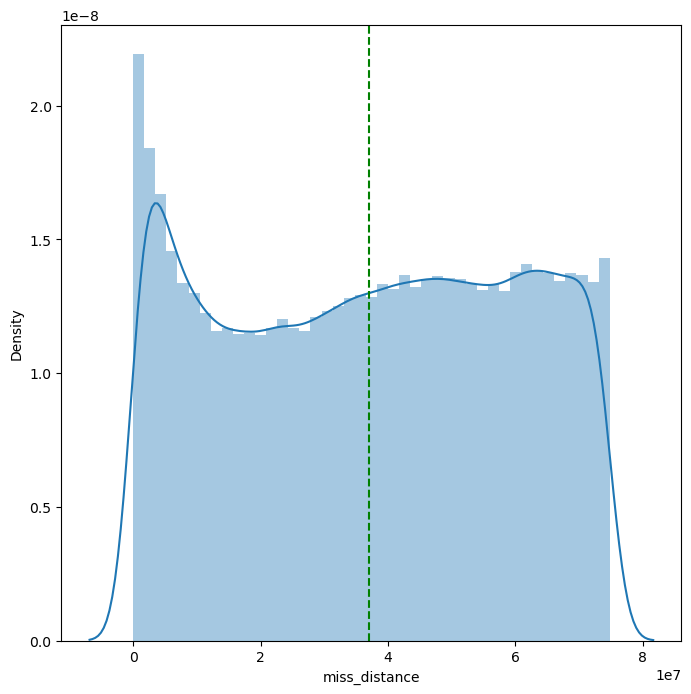

In [28]:
x,y=plt.subplots(figsize=(8,8))
sns.distplot(df["miss_distance"],hist=True,ax=y)
y.axvline(df["miss_distance"].mean(),color='g',ls="--")

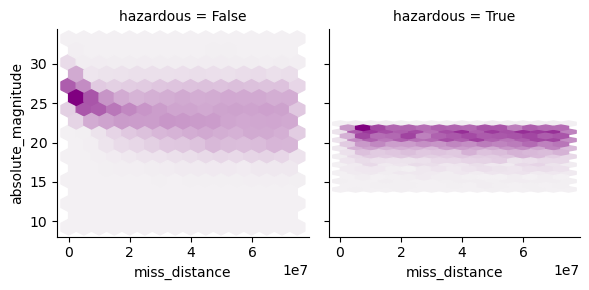

In [29]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=15, cmap=cmap, **kwargs)


g = sns.FacetGrid(eda_df,  col="hazardous")
g.map(hexbin,  "miss_distance","absolute_magnitude", color='purple');

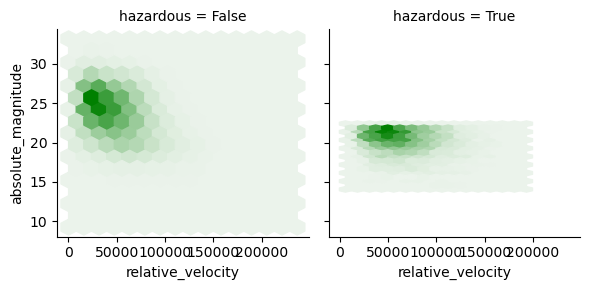

In [30]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=15, cmap=cmap, **kwargs)


g = sns.FacetGrid(eda_df,  col="hazardous")
g.map(hexbin, "relative_velocity","absolute_magnitude", color='green');

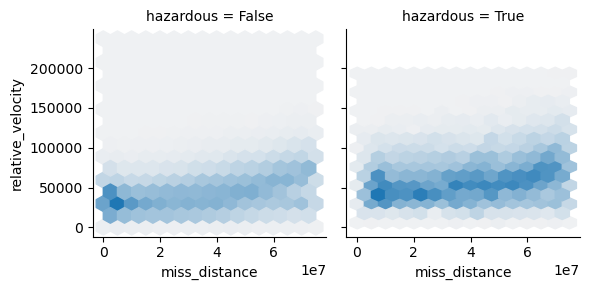

In [31]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=15, cmap=cmap, **kwargs)


g = sns.FacetGrid(eda_df,  col="hazardous")
g.map(hexbin, "miss_distance","relative_velocity");

False    0.902682
True     0.097318
Name: hazardous, dtype: float64


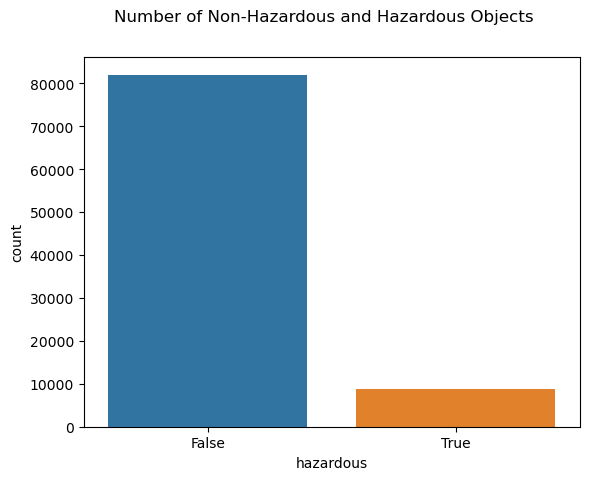

In [32]:
print(df["hazardous"].value_counts() / len(df))

sns.countplot(x='hazardous',data=df)
plt.suptitle('Number of Non-Hazardous and Hazardous Objects')
plt.rcParams['figure.figsize']=[4,4]
plt.show()

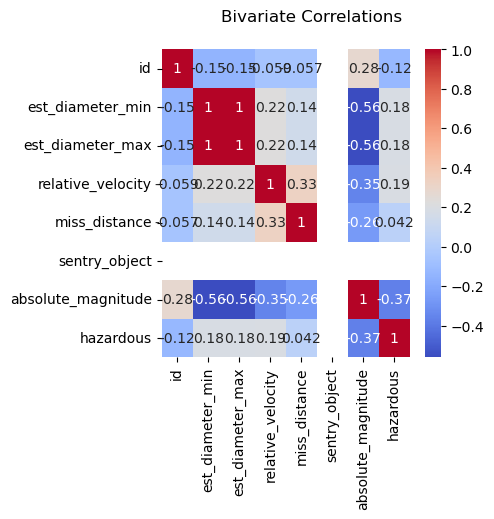

In [33]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.suptitle('Bivariate Correlations')
plt.show()


df.drop(["est_diameter_min"], axis = 1, inplace = True)

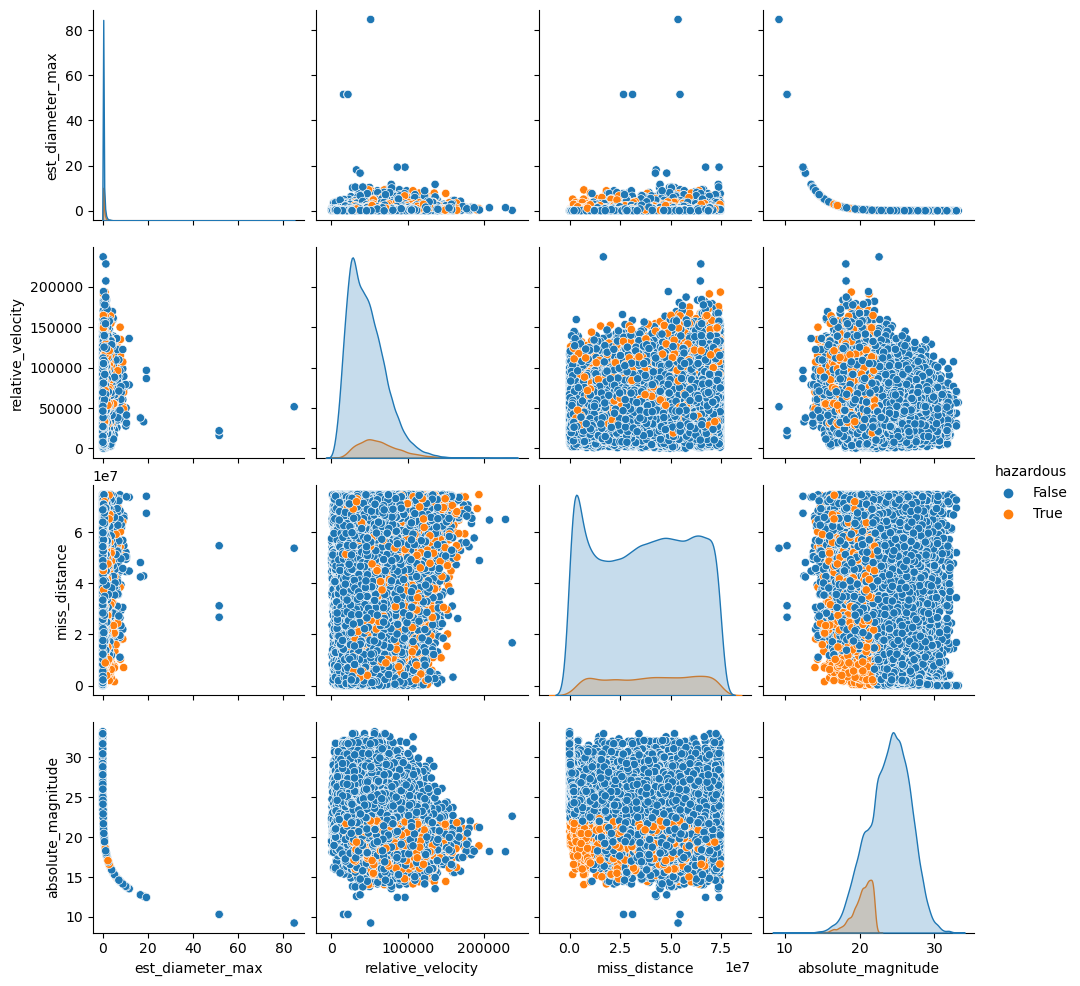

In [34]:
sns.pairplot(df[num_cols+['hazardous']],hue = 'hazardous')

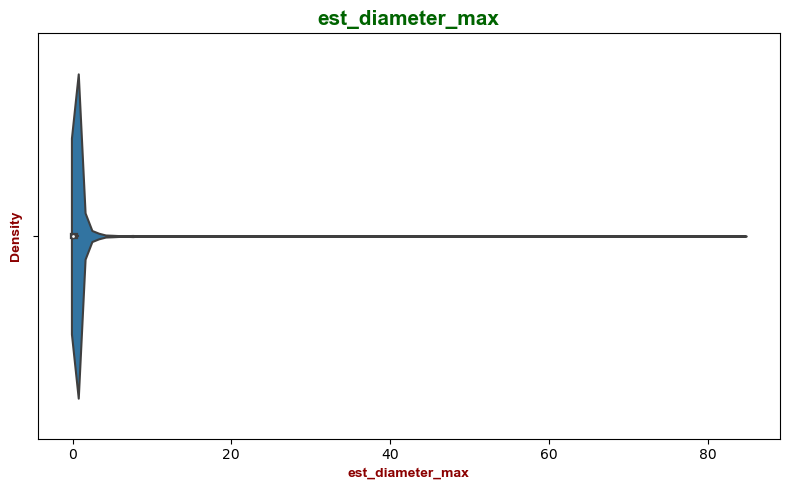

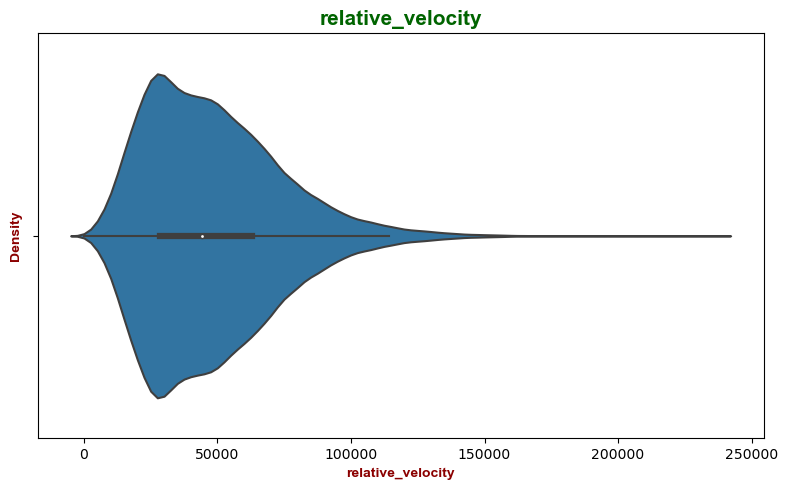

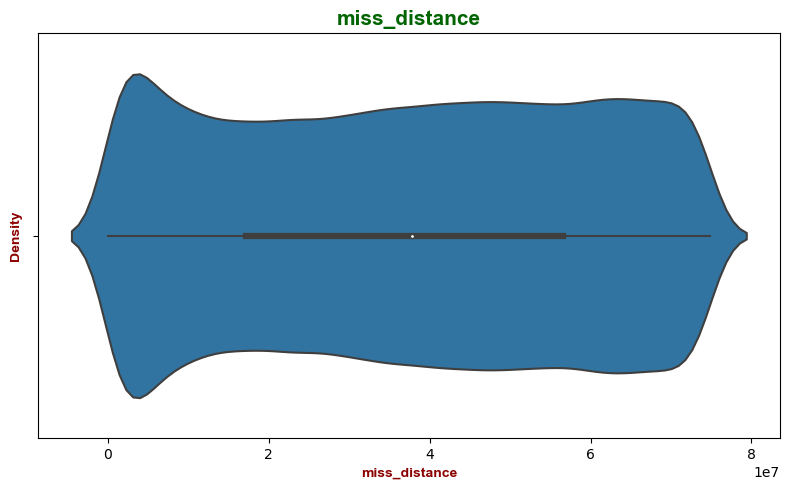

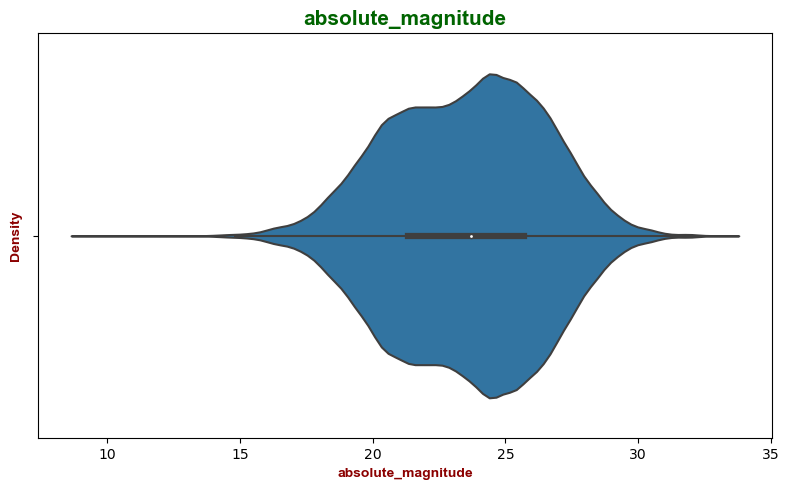

In [35]:
title_font = {"family": "arial", "color":"darkgreen","weight":"bold","size":15}
axis_font = {"family": "arial", "color":"darkred","weight":"bold","size":10}
for i,z in list(zip(num_cols,num_cols)):
    plt.figure(figsize = (8,5))
    sns.violinplot(i,data = df[num_cols])
    sns.color_palette(palette="copper")
    
    plt.title(i, fontdict = title_font)
    plt.xlabel(z, fontdict= axis_font)
    plt.ylabel("Density", fontdict = axis_font)
    
    plt.tight_layout()
    plt.show()

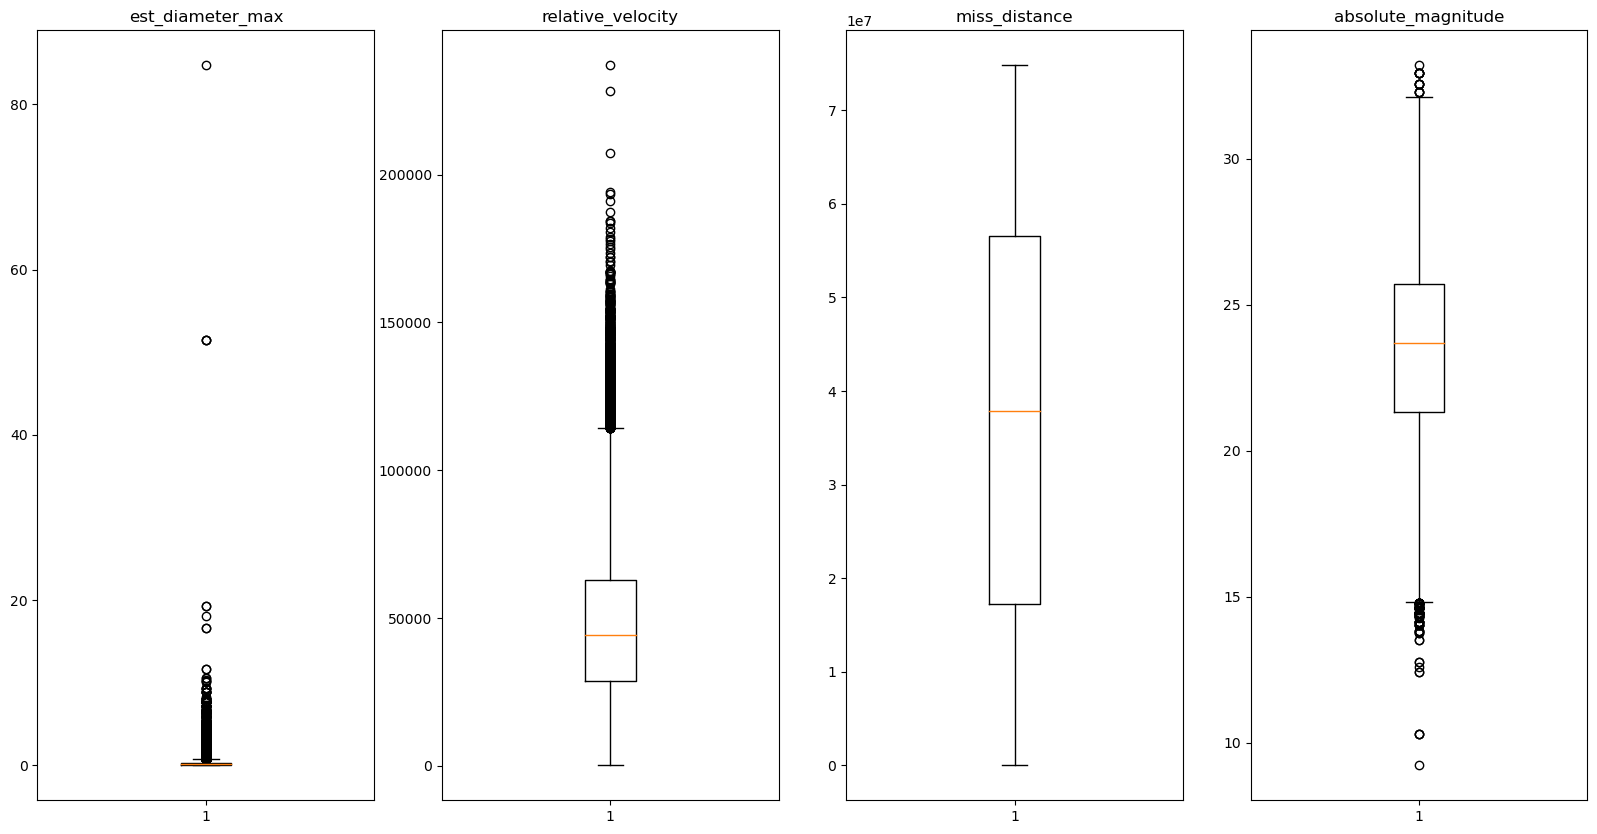

In [37]:
fig , (axis1,axis2,axis3,axis4) = plt.subplots(1,4,figsize=(20,10))
axis1.boxplot(df["est_diameter_max"])
axis1.set_title("est_diameter_max")

axis2.boxplot(df["relative_velocity"])
axis2.set_title("relative_velocity")

axis3.boxplot(df["miss_distance"])
axis3.set_title("miss_distance")

axis4.boxplot(df["absolute_magnitude"])
axis4.set_title("absolute_magnitude")

plt.show()

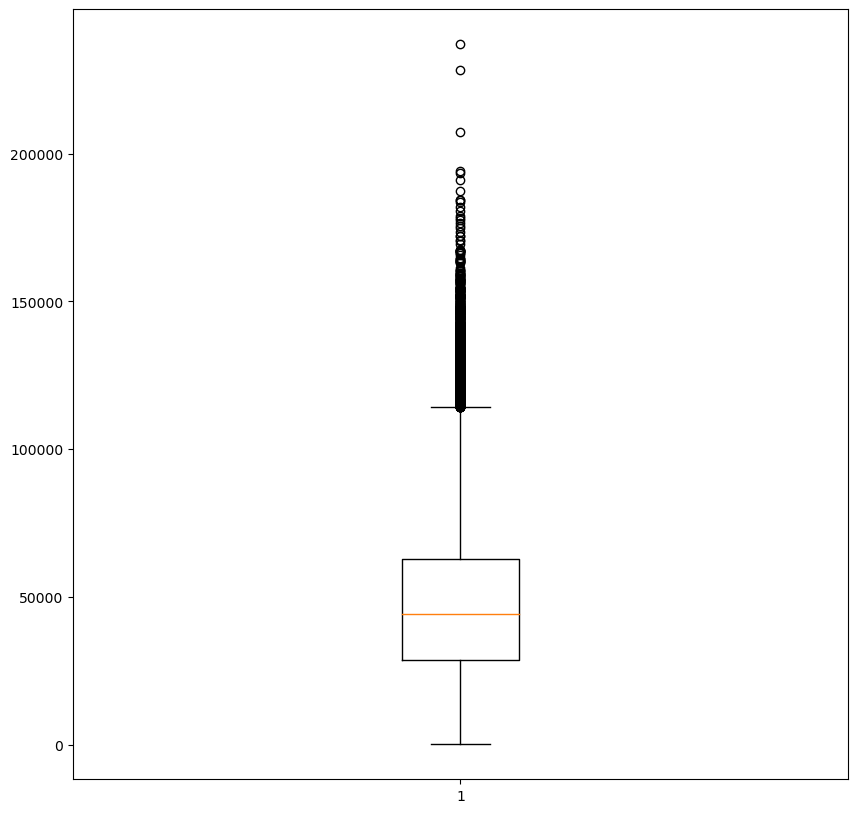

In [38]:
fig, axis = plt.subplots(figsize = (10,10))
axis.boxplot(df["relative_velocity"])
plt.show()

In [39]:
import scipy 
from scipy import stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize

In [40]:
zscore_relativevelocity = zscore(df["relative_velocity"])
zscore_relativevelocity

0       -1.363913
1        1.009040
2        2.616983
3       -0.921301
4       -0.210697
           ...   
90831    0.158619
90832   -0.077187
90833   -1.601228
90834    0.835492
90835   -0.831943
Name: relative_velocity, Length: 90836, dtype: float64

In [41]:
for i in range(1,4):
    print("Value: {}".format(i))
    print("Outliers: {}".format(len(np.where(zscore_relativevelocity > i)[0])))
    print("\n")

Value: 1
Outliers: 13951


Value: 2
Outliers: 3777


Value: 3
Outliers: 881




In [42]:
df[zscore_relativevelocity > 2][['relative_velocity']].relative_velocity.min()

98665.8136441416

In [43]:
df[df['relative_velocity']< 98665.81].relative_velocity.max()

98651.5612645194

In [44]:
w_percentile_revvelo = (stats.percentileofscore(df["relative_velocity"], 98651.56)/100)
w_percentile_revvelo

0.9584085604826281

In [45]:
1 - w_percentile_revvelo

0.041591439517371875

In [46]:
rel_vel_w = winsorize(df.relative_velocity,(0,(1 - w_percentile_revvelo)));

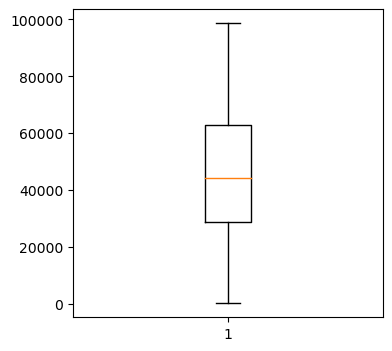

In [47]:
plt.boxplot(rel_vel_w)
plt.show()

In [48]:
df['relative_velocity'] = rel_vel_w

In [49]:
df.head()

,id,name,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),1.614507,98651.561265,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


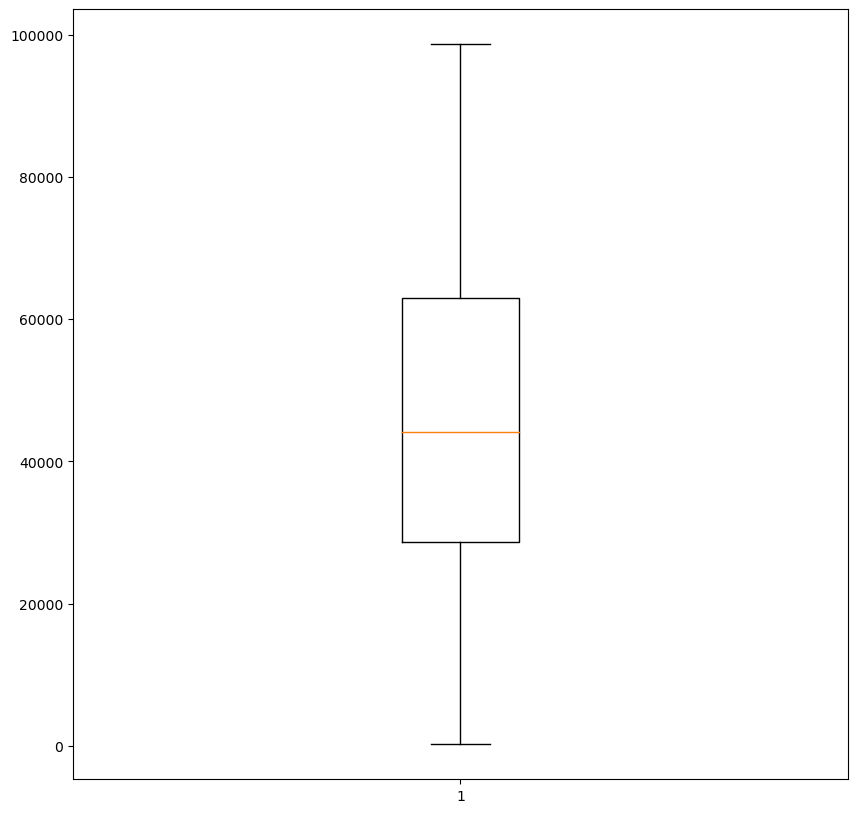

In [50]:
fig, axis = plt.subplots(figsize = (10,10))
axis.boxplot(df["relative_velocity"])
plt.show()

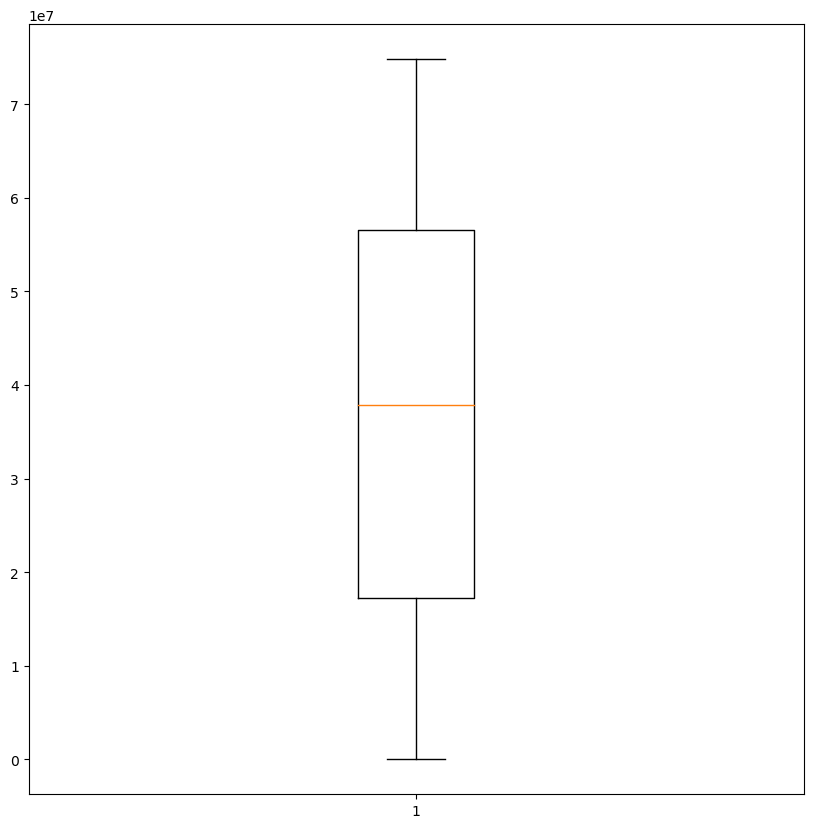

In [51]:
fig, axis = plt.subplots(figsize = (10,10))
axis.boxplot(df["miss_distance"])
plt.show()

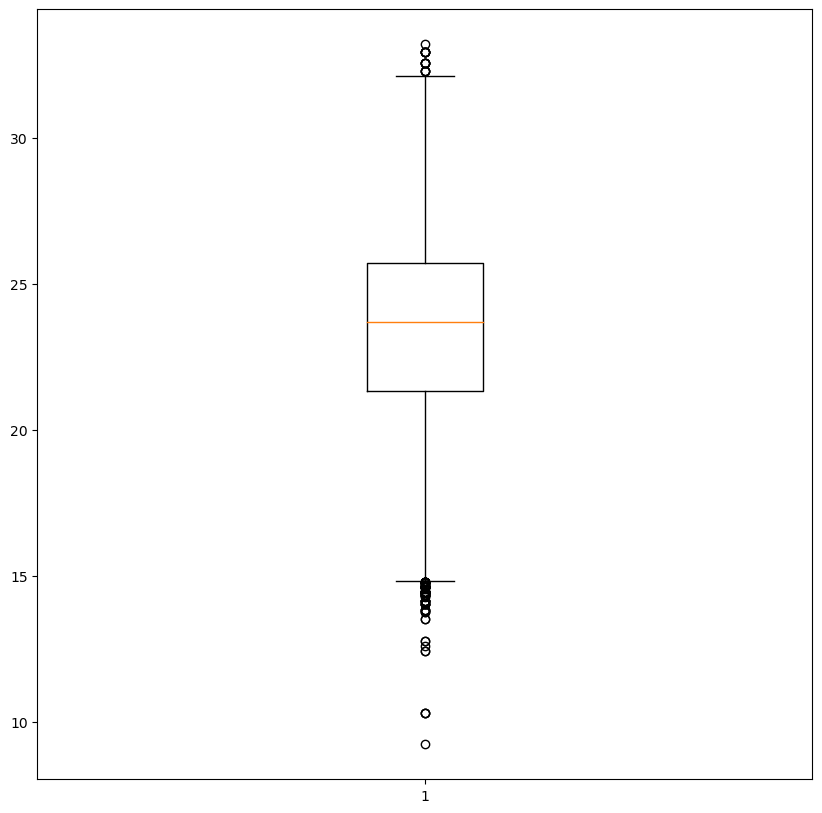

In [52]:
fig, axis = plt.subplots(figsize = (10,10))
axis.boxplot(df["absolute_magnitude"])
plt.show()

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_max    90836 non-null  float64
 3   relative_velocity   90836 non-null  float64
 4   miss_distance       90836 non-null  float64
 5   orbiting_body       90836 non-null  object 
 6   sentry_object       90836 non-null  bool   
 7   absolute_magnitude  90836 non-null  float64
 8   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(4), int64(1), object(2)
memory usage: 5.0+ MB


In [54]:
zscore_absolute_magnitude = zscore(df["absolute_magnitude"])
zscore_absolute_magnitude

0       -2.348632
1       -1.218735
2       -1.968544
3       -0.458560
4       -1.187637
           ...   
90831    0.508936
90832    0.854470
90833    0.370722
90834    1.476432
90835    0.204866
Name: absolute_magnitude, Length: 90836, dtype: float64

In [55]:
for i in range(1,4):
    print("Value: {}".format(i))
    print("Outliers: {}".format(len(np.where(zscore_absolute_magnitude> i)[0])))
    print("\n")

Value: 1
Outliers: 15213


Value: 2
Outliers: 1107


Value: 3
Outliers: 16




In [56]:
df[zscore_absolute_magnitude<-2][['absolute_magnitude']].absolute_magnitude.min()

9.23

In [57]:
df[df['absolute_magnitude']> 9.23].absolute_magnitude.max()

33.2

In [58]:
w_percentile_absolutemag = (stats.percentileofscore(df["absolute_magnitude"], 33.2)/100)
w_percentile_absolutemag

1.0

In [59]:
1 - w_percentile_absolutemag

0.0

In [60]:
abs_mag_w = winsorize(df.absolute_magnitude,(0,(1 -w_percentile_absolutemag)));

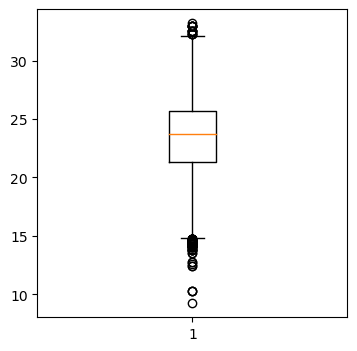

In [61]:
plt.boxplot(abs_mag_w)
plt.show()

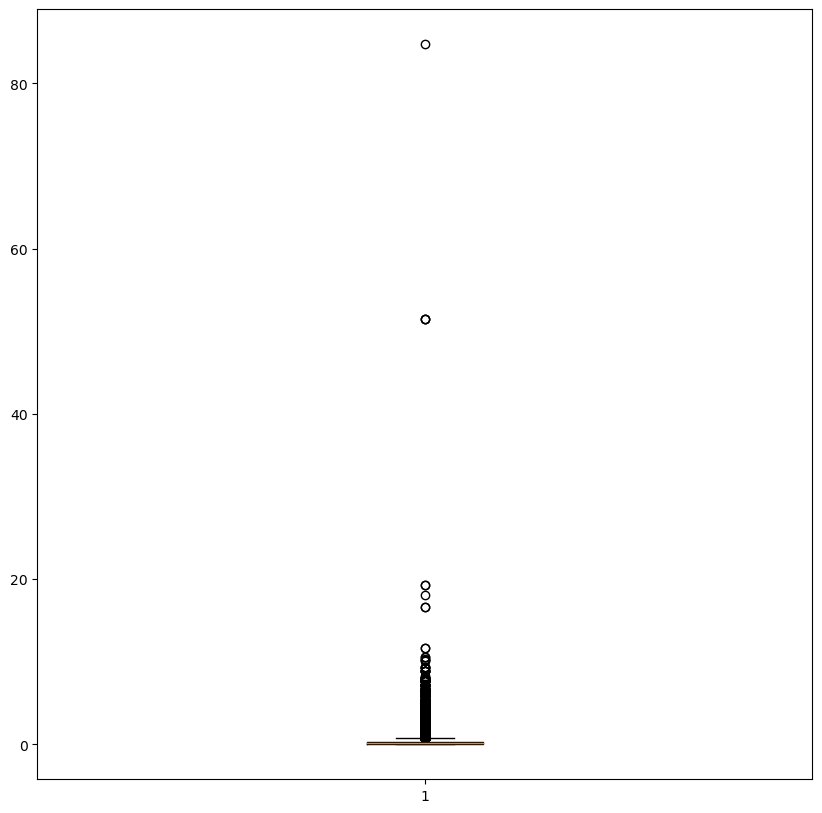

In [62]:
fig, axis = plt.subplots(figsize = (10,10))
axis.boxplot(df["est_diameter_max"])
plt.show()

In [63]:
zscore_est_dia_max = zscore(df["relative_velocity"])
zscore_est_dia_max

0       -1.444317
1        1.120301
2        2.191229
3       -0.965955
4       -0.197955
           ...   
90831    0.201191
90832   -0.053662
90833   -1.700799
90834    0.932735
90835   -0.869379
Name: relative_velocity, Length: 90836, dtype: float64

In [64]:
for i in range(1,4):
    print("Value: {}".format(i))
    print("Outliers: {}".format(len(np.where(zscore_est_dia_max > i)[0])))
    print("\n")

Value: 1
Outliers: 15788


Value: 2
Outliers: 4800


Value: 3
Outliers: 0




In [65]:
df[zscore_est_dia_max> 2][['est_diameter_max']].est_diameter_max.min()

0.0018282685

In [66]:
df[df['est_diameter_max']< 0.0018282685].est_diameter_max.max()

0.0015277067

In [67]:
w_percentile_estdiame = (stats.percentileofscore(df["est_diameter_max"], 0.0015277067)/100)
w_percentile_estdiame

4.9539830023338765e-05

In [68]:
1 - w_percentile_estdiame

0.9999504601699767

In [69]:
est_dia_me_w = winsorize(df.est_diameter_max,(0,(1 - w_percentile_estdiame)));

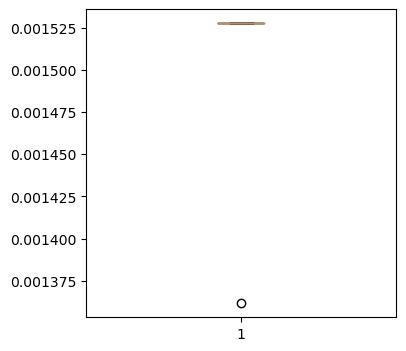

In [70]:
plt.boxplot(est_dia_me_w)
plt.show()

In [71]:
df['est_diameter_max'] = est_dia_me_w

In [72]:
df.head()

,id,name,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),0.001528,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.001528,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.001528,98651.561265,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.001528,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.001528,42737.733765,4.627557e+07,Earth,False,20.09,True
